In [ ]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
df=pd.read_csv("/content/mpox_data .csv")
df


,day,new_cases,cases_per_day
0,1,1,1.00
1,2,5,5.83
2,3,0,4.83
3,4,0,4.01
4,5,0,3.33
...,...,...,...
295,296,3,13.25
296,297,1,12.00
297,298,0,9.96
298,299,4,12.27


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# Define the SEIR model using differential equations
N = 350000000
beta=0.000006
sigma=0.2
gamma=0.83
def seir_model(y, t):
    S, E, I, R = y
    dSdt = -beta*S*I
    dEdt = beta*S*I - sigma*E
    dIdt = sigma*E - gamma*I
    dRdt = gamma*I
    return [dSdt, dEdt, dIdt, dRdt]


In [ ]:
df.shape

(300, 3)

In [ ]:
# Load the data

data=df.to_numpy()
data
t = data[:,0]
y = data[:,2]


In [ ]:
y0 = [N-1000, 0, 1000, 0]

In [ ]:
y = odeint(seir_model,y0,t)
S = y[:,0]
E = y[:,1]
I = y[:,2]
R = y[:,3]

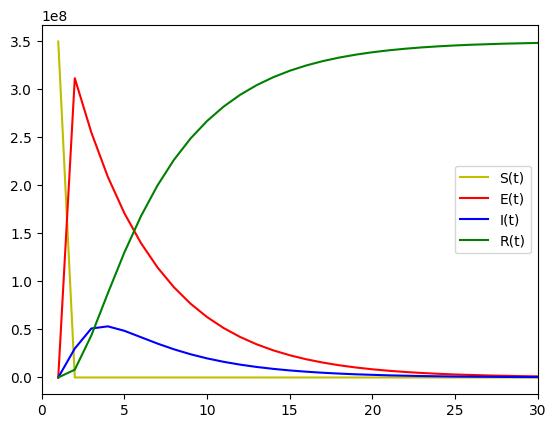

In [ ]:
plt.plot(t,S,"y",label='S(t)')
plt.plot(t,E,"r",label='E(t)')
plt.plot(t,I,"b",label='I(t)')
plt.plot(t,R,"g",label='R(t)')
plt.legend()
plt.xlim(0,30)
plt.show()

In [ ]:
observed= data[:,2]
observed

array([1.00000e+00, 5.83000e+00, 4.83000e+00, 4.01000e+00, 3.33000e+00,
       4.76000e+00, 1.09500e+01, 1.20900e+01, 1.20300e+01, 1.29900e+01,
       1.07800e+01, 9.95000e+00, 9.25000e+00, 1.06800e+01, 1.28600e+01,
       1.26800e+01, 1.25200e+01, 1.43900e+01, 1.19500e+01, 1.59100e+01,
       2.02100e+01, 2.27700e+01, 2.79000e+01, 3.61600e+01, 3.70100e+01,
       3.57200e+01, 3.56700e+01, 4.95800e+01, 6.01500e+01, 6.19200e+01,
       5.74000e+01, 7.16400e+01, 7.04600e+01, 8.54800e+01, 9.49500e+01,
       1.04800e+02, 1.21000e+02, 1.26420e+02, 1.37930e+02, 1.40480e+02,
       1.52600e+02, 1.68660e+02, 1.82980e+02, 2.13880e+02, 2.32520e+02,
       2.41990e+02, 2.55850e+02, 2.98350e+02, 3.42630e+02, 3.74380e+02,
       3.88740e+02, 4.34650e+02, 4.96760e+02, 5.34310e+02, 5.76480e+02,
       6.39480e+02, 7.13770e+02, 7.70420e+02, 8.22450e+02, 9.25630e+02,
       9.60280e+02, 1.01603e+03, 1.18930e+03, 1.22412e+03, 1.28902e+03,
       1.36889e+03, 1.48617e+03, 1.48752e+03, 1.48365e+03, 1.637

In [ ]:
def infectious(t, beta,sigma, gamma):
    N = 350000000
    I0 = 1
    X0 = [N-I0,0, I0, 0]
    return odeint(seir_model, X0, t)[:,2]

ts = np.linspace(1, len(observed) - 1, len(observed))
    
popt, pcov = curve_fit(infectious, ts, observed)

# Extract the transmission rate
beta = popt[0]








TypeError: ignored

In [ ]:
beta

1.0

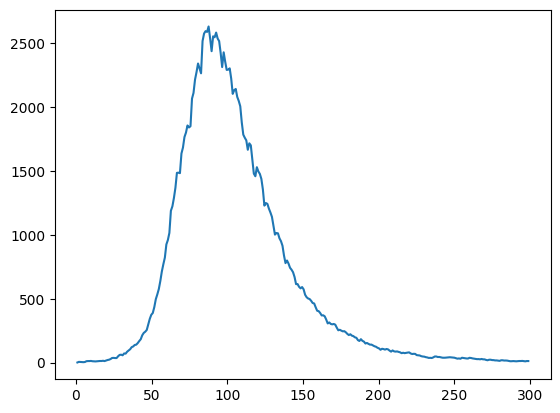

In [ ]:
plt.plot(ts,observed)

In [ ]:
fitted = infectious(ts, *popt)

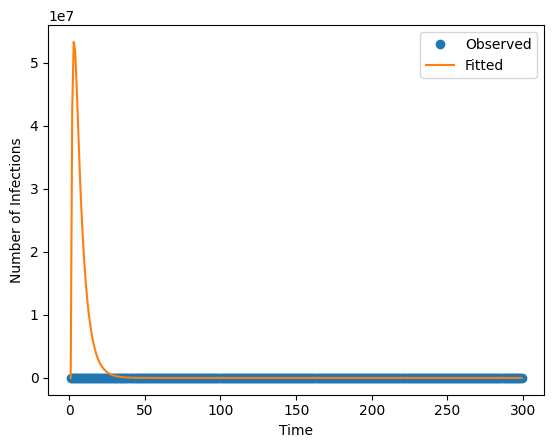

In [ ]:
plt.plot(ts, observed, 'o', label='Observed')
plt.plot(ts, fitted, '-', label='Fitted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of Infections')
plt.show()

In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Define the SEIR model using differential equations
def seir_model(y, t, beta, sigma, gamma):
    S, E, I, R = y
    dSdt = -beta*S*I
    dEdt = beta*S*I - sigma*E
    dIdt = sigma*E - gamma*I
    dRdt = gamma*I
    return [dSdt, dEdt, dIdt, dRdt]

def infectious(t, beta, sigma, gamma, I0):
    X0 = [N-I0, 0, I0, 0]
    result = odeint(seir_model, X0, t, args=(beta, sigma, gamma))
    return result[:,2]

# Load your data and set your initial conditions
df = pd.read_csv("/content/mpox_data .csv")
t = df['day'].values
observed = df['cases_per_day'].values
N = 200000
beta_init = 0.000006
sigma = 0.2
gamma = 0.83
I0 = observed[0]

# Fit the model to the data
X = sm.add_constant(t)
model = sm.OLS(observed, infectious(t, beta_init, sigma, gamma, I0))
results = model.fit()

# Get the p-values
print("Parameter p-values:\n", results.pvalues)

# Display the results
print(results.summary())


Parameter p-values:
 [2.33656208e-09]
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.113
Model:                            OLS   Adj. R-squared (uncentered):              0.110
Method:                 Least Squares   F-statistic:                              37.95
Date:                Tue, 11 Apr 2023   Prob (F-statistic):                    2.34e-09
Time:                        00:34:40   Log-Likelihood:                         -2475.5
No. Observations:                 300   AIC:                                      4953.
Df Residuals:                     299   BIC:                                      4957.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---

In [ ]:
print(beta)
print(sigma)
print(gamma)

8.405983301091694e-06
0.09521564641075646
0.8905923024155564


In [ ]:
I

array([8.63758871e+02, 8.98976591e-02, 1.04782145e-01, 1.22130984e-01,
       1.42352160e-01, 1.65921183e-01, 1.93392272e-01, 2.25411364e-01,
       2.62731303e-01, 3.06229507e-01, 3.56928583e-01, 4.16020316e-01,
       4.84893646e-01, 5.65167243e-01, 6.58727450e-01, 7.67772495e-01,
       8.94863959e-01, 1.04298672e+00, 1.21561875e+00, 1.41681232e+00,
       1.65128858e+00, 1.92454752e+00, 2.24299594e+00, 2.61409614e+00,
       3.04653888e+00, 3.55044420e+00, 4.13759457e+00, 4.82170547e+00,
       5.61873904e+00, 6.54726746e+00, 7.62889329e+00, 8.88873536e+00,
       1.03559894e+01, 1.20645740e+01, 1.40538729e+01, 1.63695866e+01,
       1.90647061e+01, 2.22006227e+01, 2.58483874e+01, 3.00901336e+01,
       3.50206738e+01, 4.07492802e+01, 4.74016502e+01, 5.51220544e+01,
       6.40756489e+01, 7.44509197e+01, 8.64622031e+01, 1.00352196e+02,
       1.16394330e+02, 1.34894833e+02, 1.56194238e+02, 1.80668029e+02,
       2.08726020e+02, 2.40809988e+02, 2.77388976e+02, 3.18951617e+02,
      

1.0